this is an image classifiction task using the SVHN DATASET

In [3]:
import tensorflow as tf
from scipy.io import loadmat
import matplotlib 
import numpy as np

we will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. 
our goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [6]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2022-05-02 13:52:45--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.1’

train_32x32.mat.1   100%[===================>] 173.61M  38.4MB/s    in 7.8s    

2022-05-02 13:52:53 (22.2 MB/s) - ‘train_32x32.mat.1’ saved [182040794/182040794]

--2022-05-02 13:52:53--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.1’

test_32x32.mat.1    100%[===================>]  61.30M  15.8MB/s    in 4.9s    

2022-05-02 13:52:58 (12.5 MB/s) - ‘test_32x32.mat.1’ saved [642

In [7]:
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset, and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset, and display them in a figure.

In [8]:
from matplotlib import image,pyplot

In [212]:
train_data=train["X"]
train_labels=train["y"]
test_data=test["X"]
test_labels=test["y"]

In [206]:
train_data.shape

(32, 32, 3, 73257)

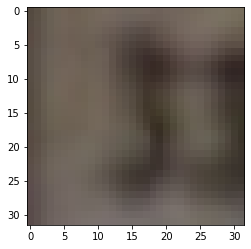

[3]


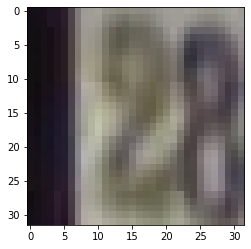

[2]


In [213]:
pyplot.imshow(train_data[:,:,:,10])
pyplot.show()
print(train_labels[10])
pyplot.imshow(train_data[:,:,:,12])
pyplot.show()
print(train_labels[12])

In [214]:
train_data=train_data.T      
test_data=test_data.T
train_data=np.average(train_data,axis=1)   #turning the photos sideways by averiging the color channels 
train_data.shape
test_data=np.average(test_data,axis=1)
test_data.shape


(26032, 32, 32)

In [215]:
train_data=np.swapaxes(train_data,-1,1)
test_data=np.swapaxes(test_data,-1,1)


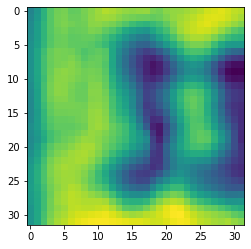

[3]


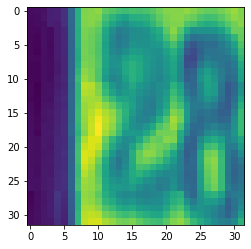

[2]


In [217]:
pyplot.imshow(train_data[10,:,:])
pyplot.show()
print(train_labels[10])
pyplot.imshow(train_data[12,:,:])
pyplot.show()
print(train_labels[12])


In [111]:
!rm -rf mycheck/

## 2. MLP neural network classifier
*  an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
model=Sequential([
    Flatten(input_shape=(32,32)),
    Dense(units=400,activation="relu"),
    Dense(units=300,activation="relu"),
    Dense(units=300,activation="relu"),
    Dense(units=200,activation="relu"),
    Dense(units=150,activation="relu"),
    Dense(units=100,activation="relu"),
    Dense(units=100,activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=11,activation="softmax")
])
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]

)
my_call=[EarlyStopping(monitor='loss',
    min_delta=0.01,
    patience=4,
    verbose=0),
    ModelCheckpoint(
    filepath="bestcheck/weights.{epoch:02d}",
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode='auto',
)]

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 400)               410000    
                                                                 
 dense_10 (Dense)            (None, 300)               120300    
                                                                 
 dense_11 (Dense)            (None, 300)               90300     
                                                                 
 dense_12 (Dense)            (None, 200)               60200     
                                                                 
 dense_13 (Dense)            (None, 150)               30150     
                                                                 
 dense_14 (Dense)            (None, 100)              

In [ ]:
history=model.fit(x=train_data,y=train_labels,epochs=25,callbacks=my_call,validation_split=0.15)

In [111]:
model.evaluate(test_data,test_labels)

814/814 [==============================] - 2s 2ms/step - loss: 1.4429 - accuracy: 0.5372


[1.4428695440292358, 0.53718501329422]

In [95]:
import pandas as pd

In [96]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,2.235065,0.275441
1,1.420607,0.529601
2,1.251750,0.602359
3,1.154803,0.640867
4,1.098224,0.659759


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epcum')]

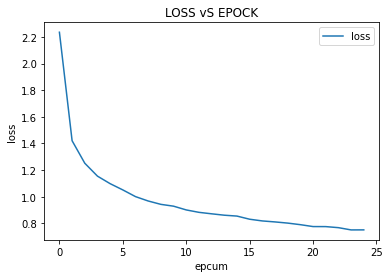

In [97]:
# Make a plot for the loss
loss_plot=df.plot(y="loss",title="LOSS vS EPOCK")
loss_plot.set(xlabel="epcum",ylabel="loss")


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 



In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [113]:
model_conv=Sequential([
    Conv2D(filters=16, input_shape=(32, 32,1), kernel_size=(3, 3), 
               activation='relu',),
    Conv2D(filters=8, kernel_size=(3, 3), 
               activation='relu',),
    MaxPooling2D(pool_size=(4, 4), name='pool_1'),
    Flatten(),
    Dense(units=80,activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=11,activation="softmax")
])
model_conv.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]

)
my_call=[EarlyStopping(monitor='loss',
    min_delta=0.01,
    patience=,
    verbose=0),
    ModelCheckpoint(
    filepath="bestcheck/weights.{epoch:02d}",
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode='auto',
)]

In [191]:
history_conv=model_conv.fit(x=train_data,y=train_labels,epochs=10,callbacks=my_call,validation_split=0.15)

Epoch 1/10
1946/1946 [==============================] - 64s 33ms/step - loss: 0.3894 - accuracy: 0.8782 - val_loss: 0.5000 - val_accuracy: 0.8529
Epoch 2/10
1946/1946 [==============================] - 66s 34ms/step - loss: 0.3808 - accuracy: 0.8798 - val_loss: 0.5654 - val_accuracy: 0.8338
Epoch 3/10
1946/1946 [==============================] - 65s 33ms/step - loss: 0.3676 - accuracy: 0.8853 - val_loss: 0.5008 - val_accuracy: 0.8558
Epoch 4/10
1946/1946 [==============================] - 65s 33ms/step - loss: 0.3596 - accuracy: 0.8868 - val_loss: 0.5806 - val_accuracy: 0.8357
Epoch 5/10
1946/1946 [==============================] - 66s 34ms/step - loss: 0.3481 - accuracy: 0.8909 - val_loss: 0.5299 - val_accuracy: 0.8533
Epoch 6/10
1946/1946 [==============================] - 66s 34ms/step - loss: 0.3379 - accuracy: 0.8941 - val_loss: 0.5125 - val_accuracy: 0.8531
Epoch 7/10
1946/1946 [==============================] - 66s 34ms/step - loss: 0.3278 - accuracy: 0.8971 - val_loss: 0.5161 -

In [116]:
model_conv.evaluate(test_data,test_labels)

814/814 [==============================] - 9s 11ms/step - loss: 0.6101 - accuracy: 0.8229


[0.6101198792457581, 0.8228718638420105]

In [192]:
df1=pd.DataFrame(history_conv.history)
df1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.389425,0.878156,0.499975,0.852944
1,0.380760,0.879762,0.565394,0.833834
2,0.367577,0.885302,0.500835,0.855765
3,0.359605,0.886780,0.580582,0.835745
4,0.348104,0.890875,0.529903,0.853308


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epcum')]

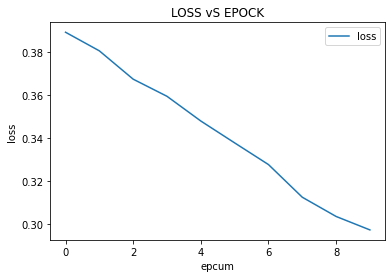

In [193]:
# Make a plot for the loss
loss_plot=df1.plot(y="loss",title="LOSS vS EPOCK")
loss_plot.set(xlabel="epcum",ylabel="loss")


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [122]:
import matplotlib.pyplot as plt

In [182]:
cool=model.predict(train_data)

In [183]:
cool.argmax(axis=1)

array([8, 8, 8, ..., 8, 4, 8])

(array([  141.,  4426., 12104.,     0.,   298.,     0.,     0.,   461.,
        52819.,  3008.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <a list of 10 Patch objects>)

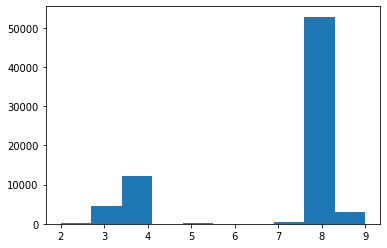

In [184]:
plt.hist(cool.argmax(axis=1))

In [194]:
cool_conv=model_conv.predict(test_data)

(array([4804., 4294., 2865., 2589., 2351., 2062., 2102., 1348., 1790.,
        1827.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

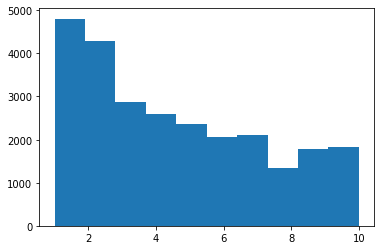

In [195]:
plt.hist(cool_conv.argmax(axis=1))

(array([5099., 4149., 2882., 2523., 2384., 1977., 2019., 1660., 1595.,
        1744.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

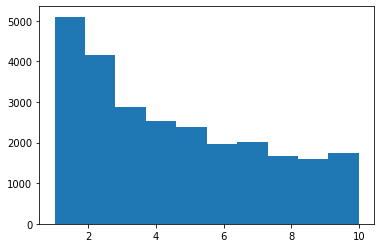

In [189]:
plt.hist(test_labels)

In [172]:
x=[[0.1,19,.1],[0.6,0.3,0.1],[0.9, 11, 25]]

In [173]:
x=np.array(x)

In [174]:
x

array([[ 0.1, 19. ,  0.1],
       [ 0.6,  0.3,  0.1],
       [ 0.9, 11. , 25. ]])

In [175]:
x.argmax(axis=0)

array([2, 0, 2])